# Importing necessary libraries

In [35]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)


#'''NLP - WordCloud'''
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import os
%pylab inline

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['trace', 'plot']
`%matplotlib` prevents importing * from pylab and numpy



# Reading data

In [36]:
df = pd.read_csv('shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Summary of Dataset

In [37]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 4895
Columns  : 15

Features :
     : ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'arms_category']

Missing values    : 0

Unique values :  
 id                         4895
name                       4851
date                       1792
manner_of_death               2
armed                        89
age                          76
gender                        2
race                          6
city                       2288
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
arms_category                12
dtype: int64


# Data Visualization

# Adding 【year】 column

In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
def get_year(x):
    return x.year

In [40]:
df['year'] = df['date'].apply(get_year)

In [41]:
trace = go.Histogram(x=df.year,marker=dict(color='rgb(223,145,163)',line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Distribution of Years',
    xaxis=dict(
        title='Years'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


### Observation:
    The above Bar plot, plots the different years of US police with their no. of shootings. It is quite clear that 2015 has the highest amont of shooting cases with more than 965 units out of 4895 samples, whereas due to Covid-19, 2020 obviously has the least case through recent years, but still we haven't finished 2020 yet, and it's already nearly 400 cases, which is really crazy.

# Adding 【month】 column 

In [42]:
xattack = df[df['threat_level'] == 'attack']
xother = df[df['threat_level'] == 'other']
xundetermined = df[df['threat_level'] == 'undetermined']

In [43]:
def get_month(x):
    return x.month

In [44]:
df['month'] = df['date'].apply(get_month)

In [73]:
trace1 = go.Histogram(
    x=xattack.month,
    opacity=0.75,
    name = "attack",
    marker=dict(color='rgb(153,201,69)'))
trace2 = go.Histogram(
    x=xother.month,
    opacity=0.75,
    name = "other",
    marker=dict(color='rgb(51,133,255)'))
trace3 = go.Histogram(
    x=xundetermined.month,
    opacity=0.75,
    name = "undetermined",
    marker=dict(color='rgb(244,109,67)'))


data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack',
                   title='Distribution of Month',
                   xaxis=dict(title='Month'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


### Observation:
    In the above, graph shows the 【number of cases】 in the data set according to different 【months】 and sorted by different 【level of threat】. For example, in May, we have 291 attack cases and 118 case were sorted as 'other', lastly, 9 underminded cases.

<AxesSubplot:title={'center':'Month vs Year'}, xlabel='month', ylabel='year'>

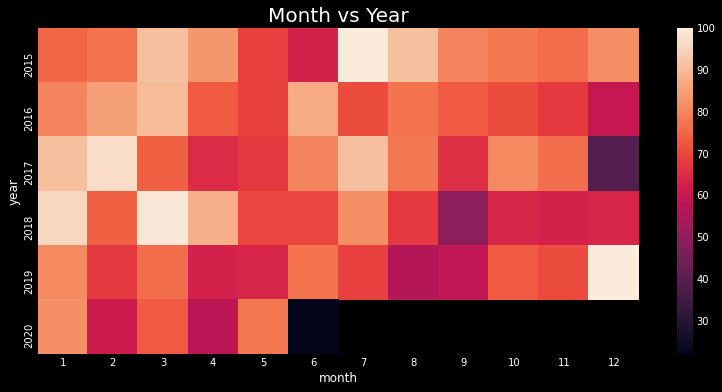

In [61]:
def count_rows(rows):
    return len(rows)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Month vs Year', fontsize = '20')
a = df.groupby('year month'.split()).apply(count_rows).unstack()
sns.heatmap(a)


# Observation:
    In the above, the heatmap shows relationships between 【month】and【year】, we can easily infer that in Dec 2019 and Mar 2018, there were great numbers of cases comparing other dates. and Dec 2017 was the date with least cases.

In [47]:
labels = sorted(df.manner_of_death.unique())
values = df.manner_of_death.value_counts().sort_index()
colors = ['crimson','aqua']
trace = go.Pie(labels=labels, values=values, pull=[0.05, 0],textinfo='percent+label', marker = dict(colors = colors))
iplot([trace])


### Observation:
    By looking at the above pie chart, shows the 【Manner of Death】analysis, we can infer that most of cases are  【shot】, nearly 95%. Whearas 【Shot and Tasered】 only has 5.07%.  

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='age'>

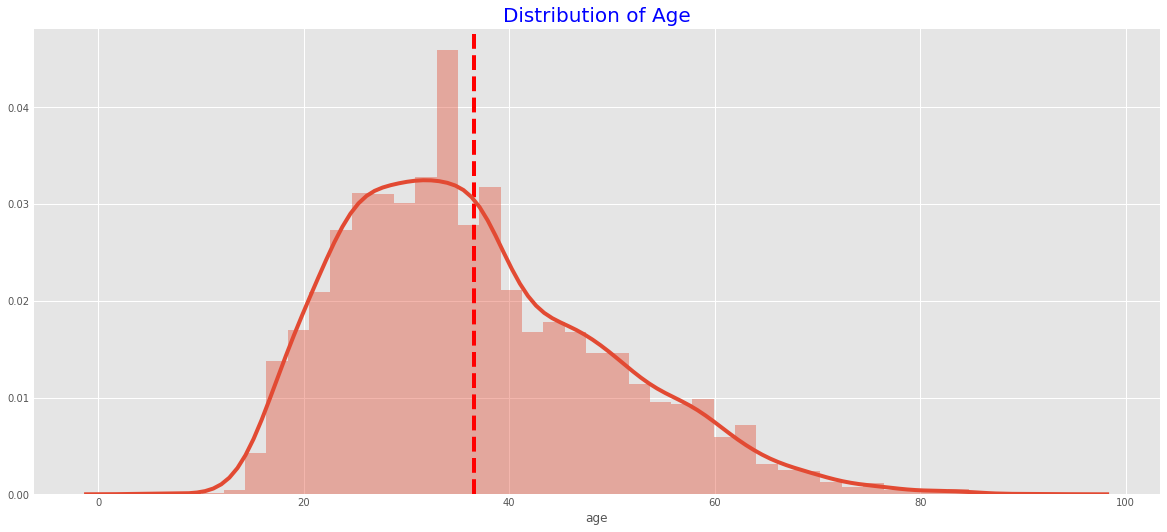

In [71]:
plt.rcParams['figure.figsize'] = (18,8)
plt.style.use('ggplot')
plt.title('Distribution of Age', fontsize = '20', color = 'blue')
plt.axvline(df['age'].mean(),linestyle='dashed',color='red')
sns.distplot(df['age'])

### Observation:
    From the graphe above, we can easily recongnise that most 'suspects' were in the age between 25 and 35, which has the largest portion in our dataset. There's only few cases before 20 years old and after 60 years old.

In [49]:
labels = sorted(df.gender.unique())
values = df.gender.value_counts().sort_index()
colors = ['aqua','black']
trace = go.Pie(labels=labels, values=values, pull=[0.05, 0],textinfo='percent+label', marker = dict(colors = colors))
iplot([trace])

### Observation:
    Not surprisingly, male has the largest portion of the whole detaset, approximately 96%.

<AxesSubplot:title={'center':'Race vs Age'}, xlabel='race', ylabel='age'>

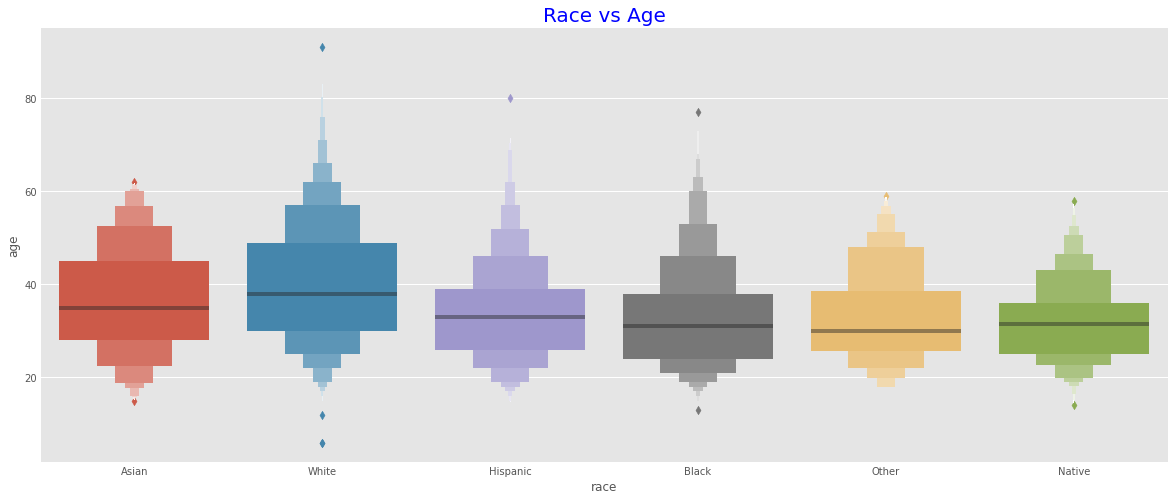

In [50]:
plt.rcParams['figure.figsize'] = (18,8)
plt.style.use('ggplot')
plt.title('Race vs Age', fontsize = 20, color = 'Blue')
sns.boxenplot(x = 'race', y = 'age', data = df)

In [51]:
xattack = df[df['threat_level'] == 'attack']
xother = df[df['threat_level'] == 'other']
xundetermined = df[df['threat_level'] == 'undetermined']


In [52]:
trace1 = go.Histogram(
    x=xattack.race,
    opacity=0.75,
    name = "attack",
    marker=dict(color='rgb(102,194,165)'))
trace2 = go.Histogram(
    x=xother.race,
    opacity=0.75,
    name = "other",
    marker=dict(color='rgb(30,110,161)'))
trace3 = go.Histogram(
    x=xundetermined.race,
    opacity=0.75,
    name = "undetermined",
    marker=dict(color='rgb(215,48,39)'))

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack',
                   title='Race vs Threat Level',
                   xaxis=dict(title='Race'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation:
    In the above, graph clearly shows that 【White people】has the most cases with nearly 2500 units, and most of them were being sorted as 【attack】.

<AxesSubplot:title={'center':'Top 10 Crime States'}, xlabel='count', ylabel='state'>

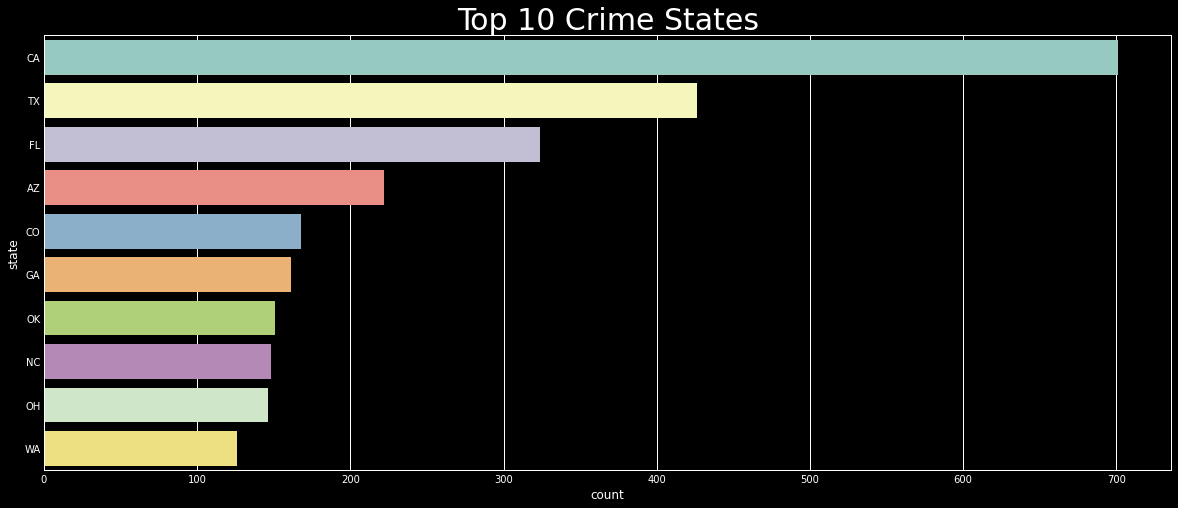

In [53]:
plt.rcParams['figure.figsize'] = (18,8)
plt.style.use('dark_background')
plt.title('Top 10 Crime States', fontweight = 40, fontsize = 30, color = 'white')
sns.countplot(y = 'state', data = df, order = df['state'].value_counts()[:10].index)

### Observation:
    Previously, I did a【business Analyst】analysis, it shows CA has the most job opportunities in the U.S, however when it comes to 【Crime Cases】, CA also ranks no.1, which is almost two times than TX.

In [54]:
labels = sorted(df.flee.unique())
values = df.flee.value_counts().sort_index()
colors = ['crimson','aqua','gold']
trace = go.Pie(labels=labels, values=values, pull=[0.05, 0],textinfo='percent+label', marker = dict(colors = colors))
iplot([trace])

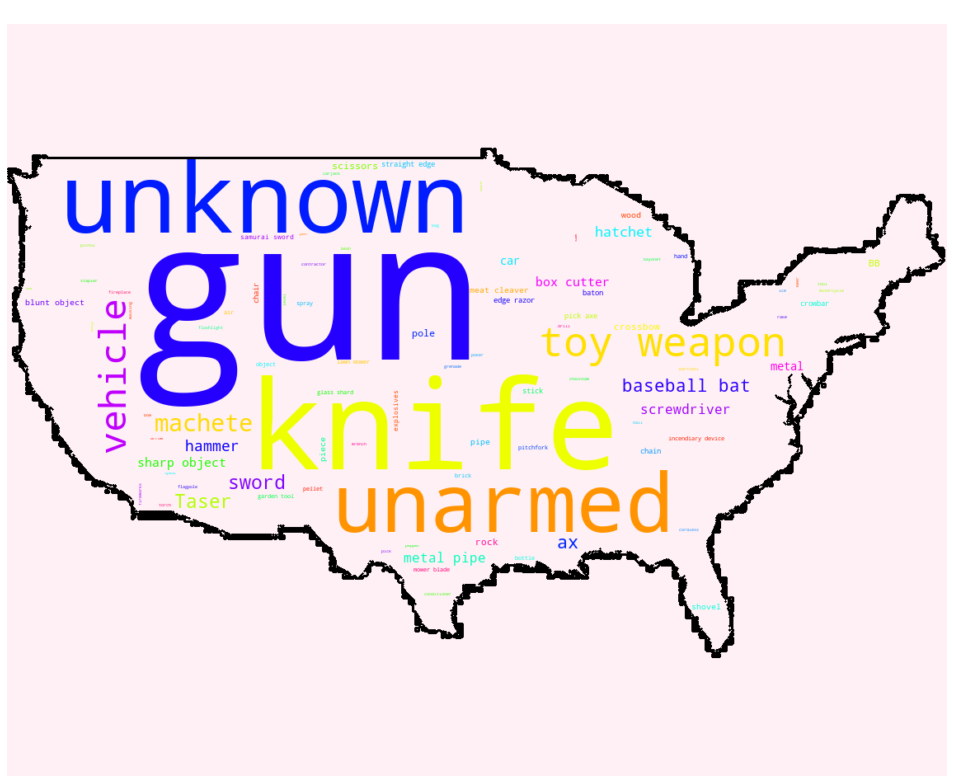

In [70]:
wave_mask= np.array(Image.open("il_1140xN.1875110874_gr8n.jpg"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=950,stopwords=stopwords,
                          height=950
                         ).generate(" ".join(df.armed))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')
plt.title('Wordcloud for armed forces')
plt.show()

In [57]:
trace1 = go.Scatter(
                    x = df['city'][:100],
                    y = df['race'],
                    mode = "markers",
                    name = "123",
                    marker = dict(color = 'rgba(231,41,138,0.8)',size=8),
                    text= df.name)


data = [trace1]
layout = dict(title = 'City - Race',
              xaxis= dict(title= 'City',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Arms Category',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

### Observation:
    In the graph beyond, it's pretty easy to find out 【white people】had left their footprints in pretty much every major cities, whereas 【Asians】and 【Natives】were relatively narrow. 